In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Read your files into Python

In [101]:
# Load the CSV data into pandas dataframes with specified encoding
df_1 = r'C:\Users\brown\Documents\DS4A - Retail Challenge - 1\BigSupplyCo_Categories.csv'
categories = pd.read_csv(df_1, encoding='latin1')  # Try 'latin1' encoding

df_2 = r'C:\Users\brown\Documents\DS4A - Retail Challenge - 1\BigSupplyCo_Customers.csv'
customers = pd.read_csv(df_2, encoding='latin1')  # Try 'latin1' encoding

df_3 = r'C:\Users\brown\Documents\DS4A - Retail Challenge - 1\BigSupplyCo_Departments.csv'
departments = pd.read_csv(df_3, encoding='latin1')  # Try 'latin1' encoding

df_4 = r'C:\Users\brown\Documents\DS4A - Retail Challenge - 1\BigSupplyCo_Orders.csv'
orders = pd.read_csv(df_4, encoding='latin1')  # Try 'latin1' encoding

df_5 = r'C:\Users\brown\Documents\DS4A - Retail Challenge - 1\BigSupplyCo_Products.csv'
products = pd.read_csv(df_5, encoding='latin1')  # Try 'latin1' encoding


In [102]:
print(categories)

    Category Id         Category Name
0            73        Sporting Goods
1            17                Cleats
2            29         Shop By Sport
3            24       Women's Apparel
4            13           Electronics
5            12          Boxing & MMA
6             9      Cardio Equipment
7            41              Trade-In
8            37           Electronics
9            38      Kids' Golf Clubs
10           44    Hunting & Shooting
11            3   Baseball & Softball
12           18        Men's Footwear
13           43      Camping & Hiking
14           65  Consumer Electronics
15           62              Cameras 
16           64             Computers
17            4            Basketball
18            2                Soccer
19           26        Girls' Apparel
20           40           Accessories
21           76      Women's Clothing
22           66                Crafts
23           70        Men's Clothing
24            6      Tennis & Racquet
25          

In [103]:
print(customers)

       Customer Id Customer City Customer Country Customer Email  \
0            20755        Caguas      Puerto Rico      XXXXXXXXX   
1            19492        Caguas      Puerto Rico      XXXXXXXXX   
2            19491      San Jose          EE. UU.      XXXXXXXXX   
3            19490   Los Angeles          EE. UU.      XXXXXXXXX   
4            19489        Caguas      Puerto Rico      XXXXXXXXX   
...            ...           ...              ...            ...   
20647        18586        Caguas      Puerto Rico      XXXXXXXXX   
20648        16322        Caguas      Puerto Rico      XXXXXXXXX   
20649        18579        Caguas      Puerto Rico      XXXXXXXXX   
20650        16244        Caguas      Puerto Rico      XXXXXXXXX   
20651         2677        Caguas      Puerto Rico      XXXXXXXXX   

      Customer Fname Customer Lname Customer Password Customer Segment  \
0              Cally       Holloway         XXXXXXXXX         Consumer   
1              Irene           Luna

In [104]:
print(departments)

       Department Id Department Name  Latitude  Longitude
0                  2         Fitness     18.25     -66.04
1                  2         Fitness     18.28     -66.04
2                  2         Fitness     37.29    -121.88
3                  2         Fitness     34.13    -118.29
4                  2         Fitness     18.25     -66.04
...              ...             ...       ...        ...
41951              7        Fan Shop     34.05    -118.25
41952              7        Fan Shop     18.23     -66.37
41953              7        Fan Shop     18.26     -66.37
41954              7        Fan Shop     32.80    -116.98
41955              7        Fan Shop     37.62    -121.12

[41956 rows x 4 columns]


In [105]:
print(orders)

        Order Id  Order Item Cardprod Id  Order Customer Id  \
0          77202                    1360              20755   
1          75939                    1360              19492   
2          75938                    1360              19491   
3          75937                    1360              19490   
4          75936                    1360              19489   
...          ...                     ...                ...   
180514     26043                    1004               1005   
180515     26037                    1004               9141   
180516     26024                    1004                291   
180517     26022                    1004               2813   
180518     26018                    1004               7547   

        Order Department Id        Market  Order City Order Country  \
0                         2  Pacific Asia      Bekasi     Indonesia   
1                         2  Pacific Asia     Bikaner         India   
2                         2  P

In [106]:
print(products)

     Product Card Id  Product Category Id  Product Description  \
0               1360                   73                  NaN   
1                365                   17                  NaN   
2                627                   29                  NaN   
3                502                   24                  NaN   
4                278                   13                  NaN   
..               ...                  ...                  ...   
113              646                   30                  NaN   
114             1361                   74                  NaN   
115             1073                   48                  NaN   
116             1059                   48                  NaN   
117             1014                   46                  NaN   

                                         Product Image  \
0         http://images.acmesports.sports/Smart+watch    
1    http://images.acmesports.sports/Perfect+Fitnes...   
2    http://images.acmesports.spo

In [107]:
orders.shape

(180519, 24)

In [108]:
orders.columns

Index(['Order Id', 'Order Item Cardprod Id', 'Order Customer Id',
       'Order Department Id', 'Market', 'Order City', 'Order Country',
       'Order Region', 'Order State', 'Order Status', 'Order Zipcode',
       'order date (DateOrders)', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Quantity',
       'Sales', 'Order Item Total', 'Order Profit', 'Type',
       'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Delivery Status', 'Late Delivery Risk'],
      dtype='object')

In [109]:
orders["Order Region"].unique()

array(['Southeast Asia', 'South Asia', 'Oceania', 'Eastern Asia',
       'West Asia', 'West of USA ', 'US Center ', 'West Africa',
       'Central Africa', 'North Africa', 'Western Europe',
       'Northern Europe', 'Central America', 'Caribbean', 'South America',
       'East Africa', 'Southern Europe', 'East of USA', 'Canada',
       'Southern Africa', 'Central Asia', 'Eastern Europe',
       'South of  USA '], dtype=object)

In [110]:
orders.nunique()

Order Id                          65752
Order Item Cardprod Id              118
Order Customer Id                 20652
Order Department Id                  11
Market                                5
Order City                         3597
Order Country                       164
Order Region                         23
Order State                        1089
Order Status                          9
Order Zipcode                       609
order date (DateOrders)           65752
Order Item Discount                1017
Order Item Discount Rate             18
Order Item Id                    180519
Order Item Quantity                   5
Sales                               193
Order Item Total                   2927
Order Profit                      21998
Type                                  4
Days for shipping (real)              7
Days for shipment (scheduled)         4
Delivery Status                       4
Late Delivery Risk                    2
dtype: int64

In [111]:
orders.describe()

,Order Id,Order Item Cardprod Id,Order Customer Id,Order Department Id,Order Zipcode,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Quantity,Sales,Order Item Total,Order Profit,Days for shipping (real),Days for shipment (scheduled),Late Delivery Risk
count,180519.00,180519.00,180519.00,180519.00,24840.00,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00
mean,36221.89,692.51,6691.38,5.44,55426.13,20.66,0.10,90260.00,2.13,203.77,183.11,21.97,3.50,2.93,0.55
std,21045.38,336.45,4162.92,1.63,31919.28,21.80,0.07,52111.49,1.45,132.27,120.04,104.43,1.62,1.37,0.50
min,1.00,19.00,1.00,2.00,1040.00,0.00,0.00,1.00,1.00,9.99,7.49,-4274.98,0.00,0.00,0.00
25%,18057.00,403.00,3258.50,4.00,23464.00,5.40,0.04,45130.50,1.00,119.98,104.38,7.00,2.00,2.00,0.00
50%,36140.00,627.00,6457.00,5.00,59405.00,14.00,0.10,90260.00,1.00,199.92,163.99,31.52,3.00,4.00,1.00
75%,54144.00,1004.00,9779.00,7.00,90008.00,29.99,0.16,135389.50,3.00,299.95,247.40,64.80,5.00,4.00,1.00
max,77204.00,1363.00,20757.00,12.00,99301.00,500.00,0.25,180519.00,5.00,1999.99,1939.99,911.80,6.00,4.00,1.00


Key customers based on order volume

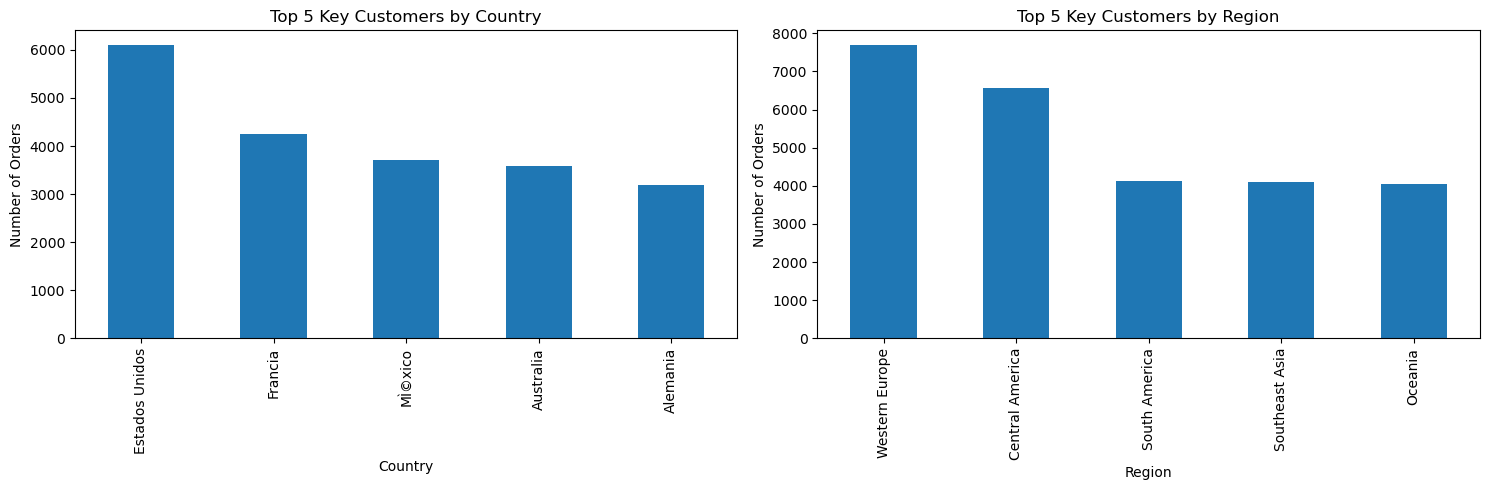

In [112]:
# Group orders by country and find the top 5 key customers
top_customers_by_country = orders.groupby(['Order Country', 'Order Customer Id'])['Order Id'].count().reset_index()
top_customers_by_country = top_customers_by_country.groupby('Order Country')['Order Id'].count().nlargest(5)

# Group orders by region and find the top 5 key customers
top_customers_by_region = orders.groupby(['Order Region', 'Order Customer Id'])['Order Id'].count().reset_index()
top_customers_by_region = top_customers_by_region.groupby('Order Region')['Order Id'].count().nlargest(5)

# Create subplots for displaying the bar graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the top customers by country
top_customers_by_country.plot(kind='bar', ax=ax1)
ax1.set_title('Top 5 Key Customers by Country')
ax1.set_xlabel('Country')
ax1.set_ylabel('Number of Orders')

# Plot the top customers by region
top_customers_by_region.plot(kind='bar', ax=ax2)
ax2.set_title('Top 5 Key Customers by Region')
ax2.set_xlabel('Region')
ax2.set_ylabel('Number of Orders')

# Display the plots
plt.tight_layout()
plt.show()



In [113]:
import folium
from folium.plugins import HeatMap

# Create a map centered on a specific location (e.g., the geographical center of your data)
m = folium.Map(location=[departments['Latitude'].mean(), departments['Longitude'].mean()], zoom_start=5)

# Create a list of points (latitude, longitude) where customers make purchases
heat_data = [[row['Latitude'], row['Longitude']] for _, row in departments.iterrows()]

# Add a heat map layer to the map
HeatMap(heat_data).add_to(m)

# Save the map to an HTML file
m.save("customer_heatmap.html")

# Display the map in your Jupyter Notebook
m

In [114]:
# Merge the 'product' and 'categories' DataFrames on 'Product Category Id'
merged_df = products.merge(categories, left_on='Product Category Id', right_on='Category Id', how='inner')

# Rename the 'Product Category Id' column to 'Category Id'
merged_df = merged_df.rename(columns={'Category Id': 'Product Category Id'})

# Display the merged DataFrame
print(merged_df)


     Product Card Id  Product Category Id  Product Description  \
0               1360                   73                  NaN   
1                365                   17                  NaN   
2                364                   17                  NaN   
3                627                   29                  NaN   
4                642                   29                  NaN   
..               ...                  ...                  ...   
113              646                   30                  NaN   
114             1361                   74                  NaN   
115             1073                   48                  NaN   
116             1059                   48                  NaN   
117             1014                   46                  NaN   

                                         Product Image  \
0         http://images.acmesports.sports/Smart+watch    
1    http://images.acmesports.sports/Perfect+Fitnes...   
2       http://images.acmesports.

In [115]:
# Concatenate the two DataFrames vertically
result_df = pd.concat([products, categories])

# Reset the index of the resulting DataFrame
result_df = result_df.reset_index(drop=True)

result_df = result_df.fillna(0)

# Display the resulting DataFrame
print(result_df)

     Product Card Id  Product Category Id  Product Description  \
0            1360.00                73.00                 0.00   
1             365.00                17.00                 0.00   
2             627.00                29.00                 0.00   
3             502.00                24.00                 0.00   
4             278.00                13.00                 0.00   
..               ...                  ...                  ...   
164             0.00                 0.00                 0.00   
165             0.00                 0.00                 0.00   
166             0.00                 0.00                 0.00   
167             0.00                 0.00                 0.00   
168             0.00                 0.00                 0.00   

                                         Product Image  \
0         http://images.acmesports.sports/Smart+watch    
1    http://images.acmesports.sports/Perfect+Fitnes...   
2    http://images.acmesports.spo

In [116]:
# Rename the column in the 'orders' DataFrame
orders = orders.rename(columns={'Order Item Cardprod Id': 'Product Card Id'})

# Merge the DataFrames
merged_df = orders.merge(result_df, on='Product Card Id', how='left')

In [117]:
print(merged_df)

        Order Id  Product Card Id  Order Customer Id  Order Department Id  \
0          77202             1360              20755                    2   
1          75939             1360              19492                    2   
2          75938             1360              19491                    2   
3          75937             1360              19490                    2   
4          75936             1360              19489                    2   
...          ...              ...                ...                  ...   
180514     26043             1004               1005                    7   
180515     26037             1004               9141                    7   
180516     26024             1004                291                    7   
180517     26022             1004               2813                    7   
180518     26018             1004               7547                    7   

              Market  Order City Order Country    Order Region  \
0       P

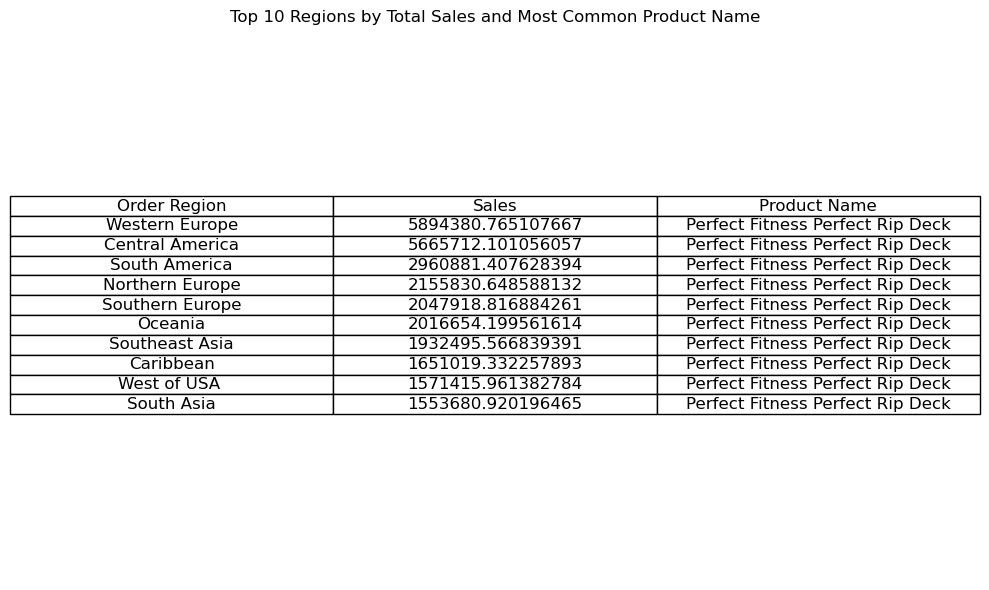

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

# Merge the 'merged_df' and 'products' DataFrames on 'Product Card Id'
merged_df = merged_df.merge(products[['Product Card Id', 'Product Name']], on='Product Card Id', how='left')

# Group the data by 'Order Region' and calculate the total sales in each region
region_sales = merged_df.groupby('Order Region')['Sales'].sum().reset_index()

# Find the most common product name in each region
common_product = merged_df.groupby('Order Region')['Product Name'].agg(lambda x: x.value_counts().idxmax()).reset_index()

# Merge the region sales and common product DataFrames
region_sales_and_common_product = region_sales.merge(common_product, on='Order Region')

# Sort the DataFrame by 'Sales' in descending order
region_sales_and_common_product = region_sales_and_common_product.sort_values(by='Sales', ascending=False)

# Select the top 10 regions
top_10_regions = region_sales_and_common_product.head(10)

# Export the top 10 regions to an Excel file
top_10_regions.to_excel('top_10_regions.xlsx', index=False)

# Create a table as a subplot within a figure
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')

# Create the table using the top 10 regions DataFrame
table = ax.table(cellText=top_10_regions.values, colLabels=top_10_regions.columns, cellLoc='center', loc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)

plt.title('Top 10 Regions by Total Sales and Most Common Product Name')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# 4. Explore sales by customer
customer_sales = orders.groupby('Order Customer Id')['Sales'].sum().sort_values(ascending=False)
print("Customer Sales:")
print(customer_sales.head(10))

Customer Sales:
Order Customer Id
791    10524.17
9371    9299.03
8766    9296.14
1657    9223.71
2641    9130.92
1288    9019.11
3710    9019.10
4249    8918.85
5654    8904.95
5624    8761.98
Name: Sales, dtype: float64


In [ ]:
# Explore customer location data
print("Unique Countries:")
print(orders['Order Country'].unique())
print("Unique Regions:")
print(orders['Order Region'].nunique())
print("Unique States:")
print(orders['Order State'].nunique())
print("Unique Cities:")
print(orders['Order City'].nunique())


Unique Countries:
['Indonesia' 'India' 'Australia' 'China' 'JapÌ_n' 'Corea del Sur'
 'Singapur' 'TurquÌ_a' 'Mongolia' 'Estados Unidos' 'Nigeria'
 'RepÌ¼blica DemocrÌÁtica del Congo' 'Senegal' 'Marruecos' 'Alemania'
 'Francia' 'PaÌ_ses Bajos' 'Reino Unido' 'Guatemala' 'El Salvador'
 'PanamÌÁ' 'RepÌ¼blica Dominicana' 'Venezuela' 'Colombia' 'Honduras'
 'Brasil' 'MÌ©xico' 'Uruguay' 'Argentina' 'Cuba' 'PerÌ¼' 'Nicaragua'
 'Ecuador' 'Angola' 'SudÌÁn' 'Somalia' 'Costa de Marfil' 'Egipto' 'Italia'
 'EspaÌ±a' 'Suecia' 'Austria' 'Canada' 'Madagascar' 'Argelia' 'Liberia'
 'Zambia' 'NÌ_ger' 'SudAfrica' 'Mozambique' 'Tanzania' 'Ruanda' 'Israel'
 'Nueva Zelanda' 'BangladÌ©s' 'Tailandia' 'Irak' 'Arabia SaudÌ_'
 'Filipinas' 'KazajistÌÁn' 'IrÌÁn' 'Myanmar (Birmania)' 'UzbekistÌÁn'
 'BenÌ_n' 'CamerÌ¼n' 'Kenia' 'Togo' 'Ucrania' 'Polonia' 'Portugal'
 'Rumania' 'Trinidad y Tobago' 'AfganistÌÁn' 'PakistÌÁn' 'Vietnam'
 'Malasia' 'Finlandia' 'Rusia' 'Irlanda' 'Noruega' 'Eslovaquia' 'BÌ©lgica'
 'Bolivia' 'Chil

In [ ]:
#6. Analyze late delivery risks
late_delivery_risks = orders['Late Delivery Risk'].value_counts()
print("Late Delivery Risks:")
print(late_delivery_risks)



Late Delivery Risks:
1    98977
0    81542
Name: Late Delivery Risk, dtype: int64


In [ ]:
# 7. Explore order statuses
order_statuses = orders['Order Status'].value_counts()
print("Order Statuses:")
print(order_statuses)

Order Statuses:
COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: Order Status, dtype: int64


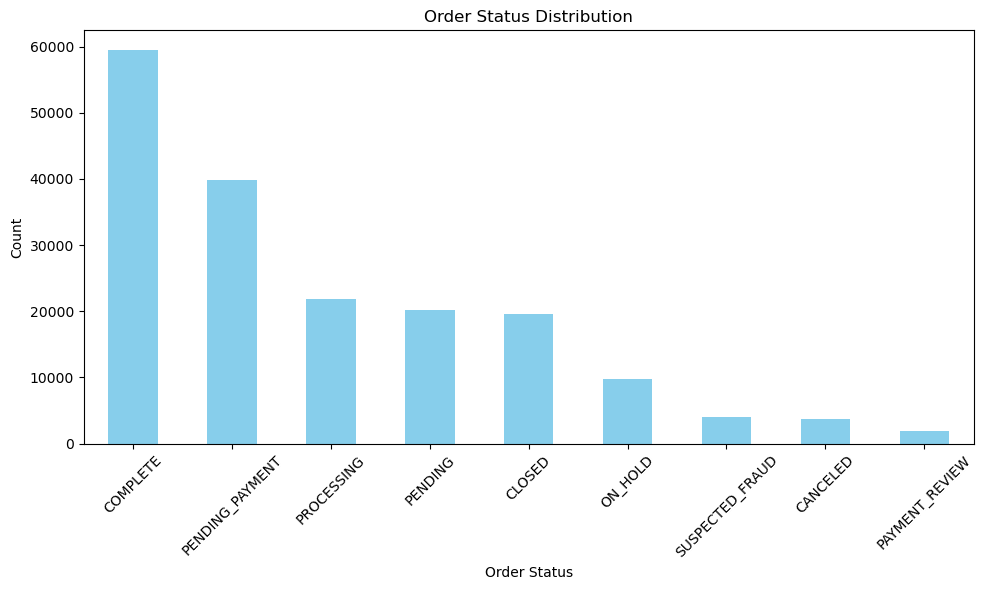

In [ ]:
# Data from the order statuses
order_statuses = orders['Order Status'].value_counts()

# Create a bar graph
plt.figure(figsize=(10, 6))
order_statuses.plot(kind='bar', color='skyblue')
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Count')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

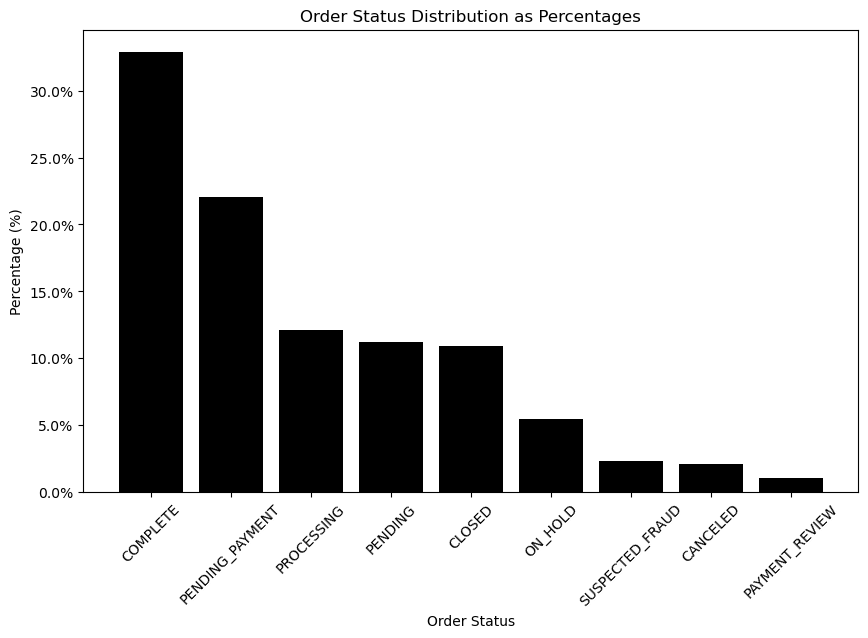

In [ ]:
# Calculate percentages
order_statuses_percent = (order_statuses / order_statuses.sum()) * 100

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(order_statuses_percent.index, order_statuses_percent, color='black')

plt.xlabel('Order Status')
plt.ylabel('Percentage (%)')
plt.title('Order Status Distribution as Percentages')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%'))
plt.show()

In [ ]:
# 8. Calculate average order profit by customer
avg_profit_by_customer = orders.groupby('Order Customer Id')['Order Profit'].mean().sort_values(ascending=False)
print("Average Order Profit by Customer:")
print(avg_profit_by_customer.head(10))

Average Order Profit by Customer:
Order Customer Id
14111    720.299988
14221    720.000000
14239    720.000000
14254    712.950012
14089    708.750000
14237    705.599976
14255    705.599976
14095    705.000000
14362    698.400024
14110    698.400024
Name: Order Profit, dtype: float64


Calculate sales by region (Tableau Viz)

In [ ]:
# Set the float format for display
pd.options.display.float_format = '{:.2f}'.format

# Group by 'Order Region' and sum 'Sales'
sales_by_region = orders.groupby('Order Region')['Sales'].sum().reset_index()

# Sort the results by sales in descending order
sales_by_region = sales_by_region.sort_values(by='Sales', ascending=False)

# Print the sales by region
print(sales_by_region)

# Specify the Excel file name and sheet name
excel_file = 'sales_by_region.xlsx'
sheet_name = 'SalesByRegion'

# Export to Excel 
sales_by_region.to_excel(excel_file, sheet_name=sheet_name, index=False)

print(f"Data has been exported to {excel_file} in sheet {sheet_name}.")

       Order Region      Sales
22   Western Europe 5894380.77
3   Central America 5665712.10
12    South America 2960881.41
10  Northern Europe 2155830.65
17  Southern Europe 2047918.82
11          Oceania 2016654.20
15   Southeast Asia 1932495.57
1         Caribbean 1651019.33
21     West of USA  1571415.96
13       South Asia 1553680.92
7      Eastern Asia 1486401.34
6       East of USA 1371111.99
20        West Asia 1174671.78
18       US Center  1151355.77
14   South of  USA   785783.95
8    Eastern Europe  774266.57
19      West Africa  727951.19
9      North Africa  634752.22
5       East Africa  376234.90
2    Central Africa  327263.02
16  Southern Africa  228251.59
0            Canada  186861.04
4      Central Asia  109839.93
Data has been exported to sales_by_region.xlsx in sheet SalesByRegion.


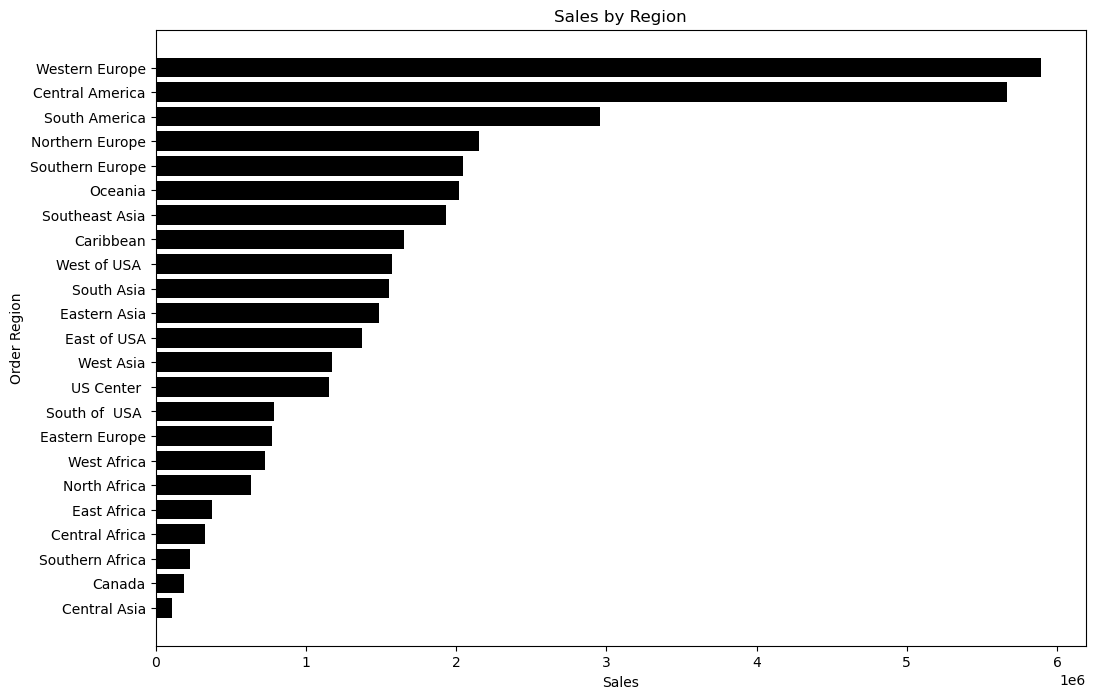

In [ ]:
# Data from the table
regions = sales_by_region['Order Region']
sales = sales_by_region['Sales']

# Create a bar graph
plt.figure(figsize=(12, 8))
plt.barh(regions, sales, color='black')
plt.xlabel('Sales')
plt.ylabel('Order Region')
plt.title('Sales by Region')
plt.gca().invert_yaxis()  # Reverse the order of regions
plt.show()

Lets take a look at order shipping and delivery numbers to get a better idea of shipping efficiency.

In [ ]:
# Group the data by 'Order Region' and 'Delivery Status' and count occurrences
delivery_status_by_region = orders.groupby(['Order Region', 'Delivery Status']).size().reset_index(name='Count')

# More structured layout
delivery_status_by_region_pivot = delivery_status_by_region.pivot(index='Order Region', columns='Delivery Status', values='Count')

# Fill NaN values with 0
delivery_status_by_region_pivot = delivery_status_by_region_pivot.fillna(0)

# Print or display the delivery status by region
print(delivery_status_by_region_pivot)

Delivery Status  Advance shipping  Late delivery  Shipping canceled  \
Order Region                                                          
Canada                        282            468                 52   
Caribbean                    1997           4415                367   
Central Africa                354            972                 61   
Central America              6566          15518               1167   
Central Asia                  112            306                 11   
East Africa                   399           1036                 71   
East of USA                  1560           3849                298   
Eastern Asia                 1754           3955                307   
Eastern Europe                879           2182                135   
North Africa                  760           1762                146   
Northern Europe              2341           5292                384   
Oceania                      2324           5482                415   
South 

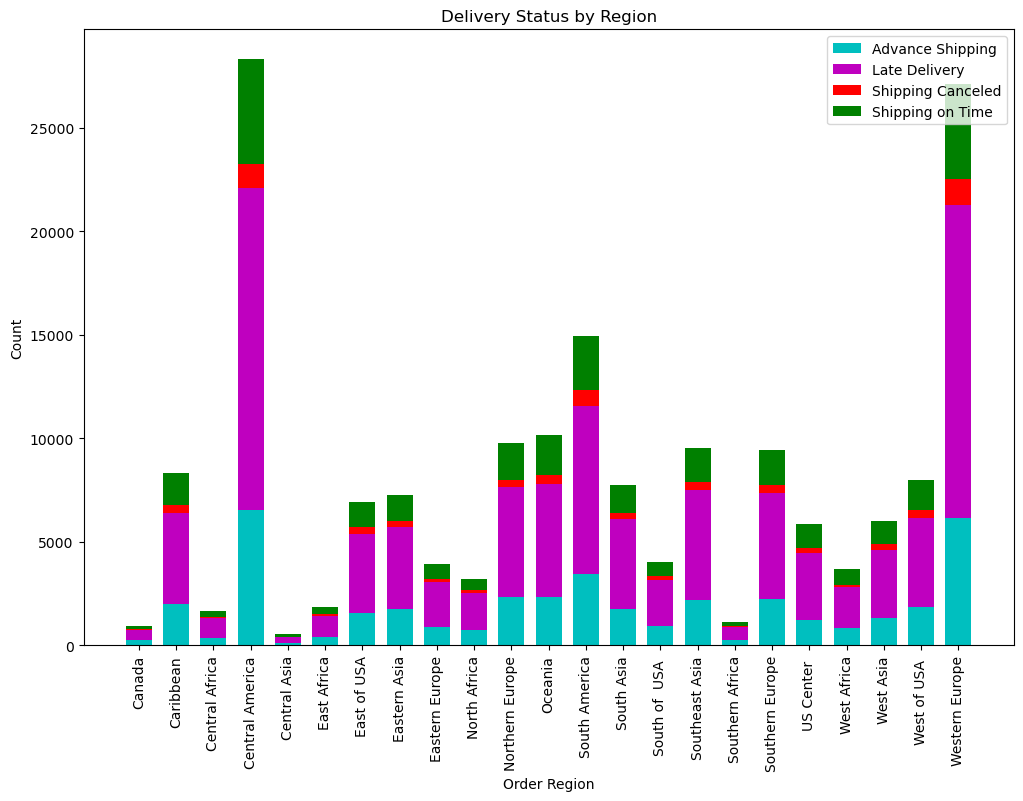

In [120]:
# Data from the table
regions = delivery_status_by_region_pivot.index
advance_shipping = delivery_status_by_region_pivot['Advance shipping']
late_delivery = delivery_status_by_region_pivot['Late delivery']
shipping_canceled = delivery_status_by_region_pivot['Shipping canceled']
shipping_on_time = delivery_status_by_region_pivot['Shipping on time']

# Create a stacked bar graph
plt.figure(figsize=(12, 8))
plt.bar(regions, advance_shipping, label='Advance Shipping', color='c', width=0.7)
plt.bar(regions, late_delivery, label='Late Delivery', color='m', width=0.7, bottom=advance_shipping)
plt.bar(regions, shipping_canceled, label='Shipping Canceled', color='r', width=0.7, bottom=advance_shipping + late_delivery)
plt.bar(regions, shipping_on_time, label='Shipping on Time', color='g', width=0.7, bottom=advance_shipping + late_delivery + shipping_canceled)

plt.xlabel('Order Region')
plt.ylabel('Count')
plt.title('Delivery Status by Region')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

Delivery Status  Advance shipping  Late delivery  Shipping canceled  \
Order Region                                                          
Central Asia                  112            306                 11   
West Africa                   849           1953                125   
US Center                    1227           3252                234   
Oceania                      2324           5482                415   
Caribbean                    1997           4415                367   

Delivery Status  Shipping on time  OnTime_to_Late_Ratio  
Order Region                                             
Central Asia                  124                  0.41  
West Africa                   769                  0.39  
US Center                    1174                  0.36  
Oceania                      1927                  0.35  
Caribbean                    1539                  0.35  


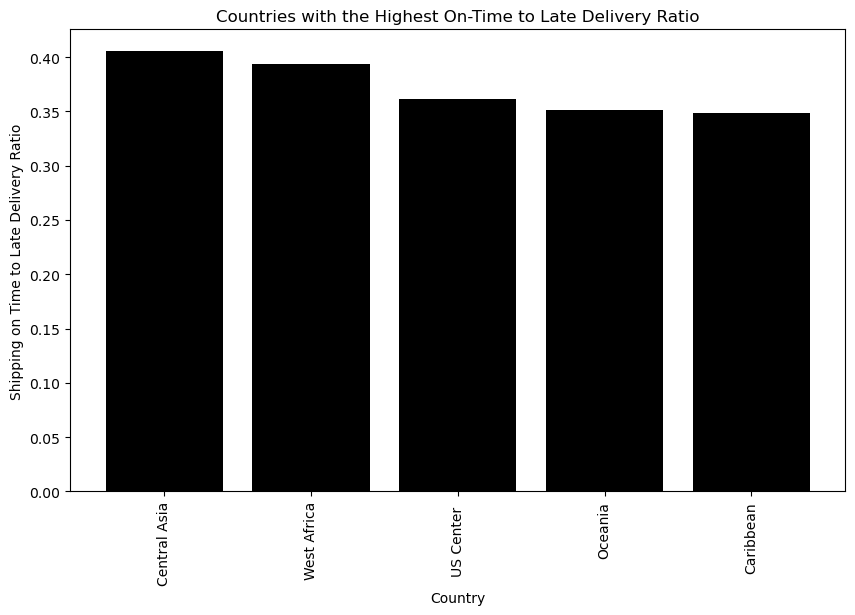

In [121]:
# Calculate the ratio of Shipping on Time to Late Delivery
delivery_status_by_region_pivot['OnTime_to_Late_Ratio'] = delivery_status_by_region_pivot['Shipping on time'] / delivery_status_by_region_pivot['Late delivery']

# Sort the data by the ratio in descending order
sorted_by_ratio = delivery_status_by_region_pivot.sort_values(by='OnTime_to_Late_Ratio', ascending=False)

# Filter the countries with the highest ratio
countries_with_high_ratio = sorted_by_ratio.head()

# Display the result
print(countries_with_high_ratio)

import matplotlib.pyplot as plt

# Filtered data with the highest ratio
countries = countries_with_high_ratio.index
ratios = countries_with_high_ratio['OnTime_to_Late_Ratio']

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(countries, ratios, color='black')

plt.xlabel('Country')
plt.ylabel('Shipping on Time to Late Delivery Ratio')
plt.title('Countries with the Highest On-Time to Late Delivery Ratio')
plt.xticks(rotation=90)
plt.show()

After Performing some exploratory data analysis of the datasets to obtain key insights on our customers, sales and profit figures, and shipping efficiency, we will now examine customer segmentation, retention rates, and key correlations. 

Data Preperation

In [ ]:
# Merge relevant data frames based on common columns (e.g., Customer Id)
merged_df = pd.merge(orders, customers, left_on='Order Customer Id', right_on='Customer Id', how='inner')

Categorize Customers into Segments and Timeframes

In [ ]:
# Define customer segments
customer_segments = merged_df['Customer Segment'].unique()

# Create timeframes (monthly)
merged_df['order date (DateOrders)'] = pd.to_datetime(merged_df['order date (DateOrders)'])
merged_df['Order Month'] = merged_df['order date (DateOrders)'].dt.to_period('M')

Calculate Retention Rates

In [ ]:
# Calculate retention rates
retention_rates = []

for segment in customer_segments:
    segment_df = merged_df[merged_df['Customer Segment'] == segment]
    unique_months = segment_df['Order Month'].unique()

    for i in range(1, len(unique_months)):
        prev_month = unique_months[i - 1]
        current_month = unique_months[i]

        prev_month_customers = set(segment_df[segment_df['Order Month'] == prev_month]['Customer Id'])
        current_month_customers = set(segment_df[segment_df['Order Month'] == current_month]['Customer Id'])

        repeat_customers = len(prev_month_customers.intersection(current_month_customers))
        total_customers = len(prev_month_customers)

        retention_rate = (repeat_customers / total_customers) * 100
        retention_rates.append({'Segment': segment, 'Timeframe': current_month, 'Retention Rate': retention_rate})

# Create a DataFrame for retention rates
retention_df = pd.DataFrame(retention_rates)

Identify Retention Rate Patterns

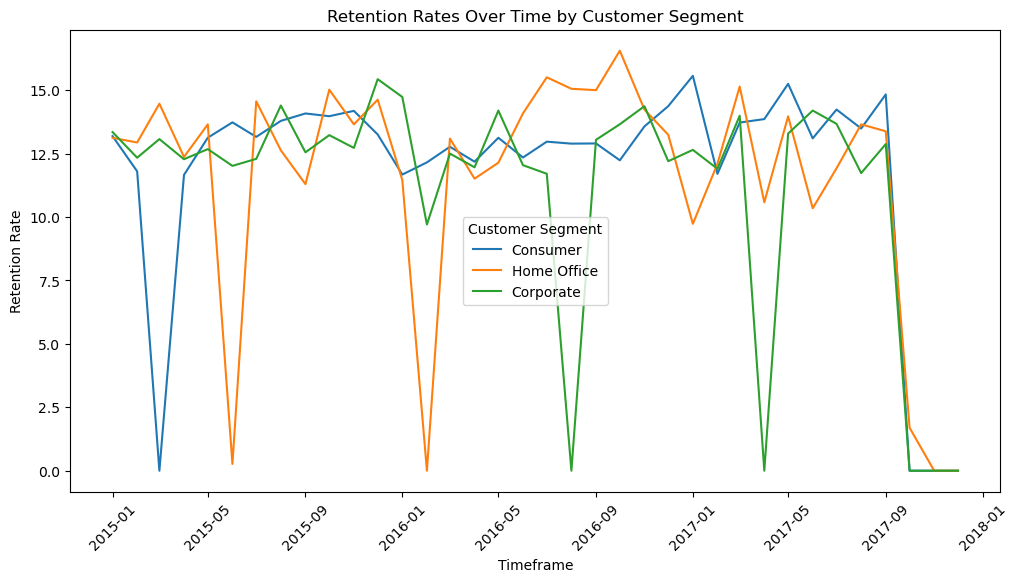

In [ ]:
# Convert 'Timeframe' from PeriodDtype to datetime
retention_df['Timeframe'] = retention_df['Timeframe'].dt.to_timestamp()

# Ensure 'Retention Rate' is of numeric data type (e.g., float)
retention_df['Retention Rate'] = retention_df['Retention Rate'].astype(float)

# line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=retention_df, x='Timeframe', y='Retention Rate', hue='Segment')
plt.title('Retention Rates Over Time by Customer Segment')
plt.xlabel('Timeframe')
plt.ylabel('Retention Rate')
plt.xticks(rotation=45)
plt.legend(title='Customer Segment')
plt.show()

In [ ]:
# Pivot table for reshaping
pivot_retention = retention_df.pivot_table(index='Timeframe', columns='Segment', values='Retention Rate')

# Export to Excel 
pivot_retention.to_excel('pivot_retention.xlsx')

pivot_retention

Segment,Consumer,Corporate,Home Office
Timeframe,,,
2015-01-01,13.19,13.35,13.12
2015-02-01,11.80,12.34,12.94
2015-03-01,0.00,13.07,14.47
2015-04-01,11.66,12.28,12.37
2015-05-01,13.13,12.68,13.65
2015-06-01,13.73,12.02,0.27
2015-07-01,13.16,12.29,14.56
2015-08-01,13.79,14.39,12.63
2015-09-01,14.08,12.55,11.30


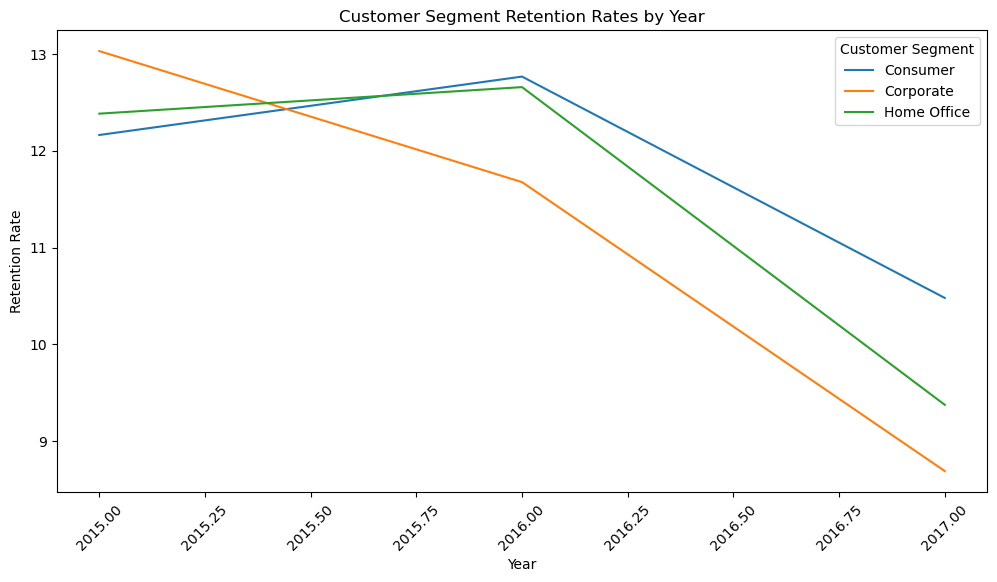

In [ ]:
# Extract the year from the 'Timeframe' column
retention_df['Year'] = retention_df['Timeframe'].dt.year

# Calculate the average retention rate for each customer segment in each year
retention_by_year = retention_df.groupby(['Year', 'Segment'])['Retention Rate'].mean().reset_index()

# Create a pivot table for the tabular view
retention_pivot = retention_by_year.pivot(index='Year', columns='Segment', values='Retention Rate')

# Plot the retention rates by year for each segment
plt.figure(figsize=(12, 6))
for segment in retention_pivot.columns:
    plt.plot(retention_pivot.index, retention_pivot[segment], label=segment)

plt.title('Customer Segment Retention Rates by Year')
plt.xlabel('Year')
plt.ylabel('Retention Rate')
plt.legend(title='Customer Segment')
plt.xticks(rotation=45)
plt.show()

retention_pivot

retention_pivot.to_excel('retention_rates_by_year.xlsx')

In [ ]:
# Calculate year-over-year (YoY) decrease in retention rates
yoy_decrease_table = retention_pivot.pct_change(fill_method='pad') * 100  # Calculate as a percentage change

# Display the table with YoY decreases
print(yoy_decrease_table)

yoy_decrease_table.to_excel('YoY_decrease_retention.xlsx')



Segment  Consumer  Corporate  Home Office
Year                                     
2015          NaN        NaN          NaN
2016         4.96     -10.39         2.21
2017       -17.90     -25.55       -25.92


In [122]:
# Create a time series for each segment
consumer_ts = pivot_retention['Consumer']
corporate_ts = pivot_retention['Corporate']
home_office_ts = pivot_retention['Home Office']

# Define the order of AR and MA terms 
p = 1  # AR order
q = 1  # MA order
d = 0  # I order (no differencing)

# Fit ARIMA models to the time series
arma_consumer = sm.tsa.ARIMA(consumer_ts, order=(p, d, q)).fit()
arma_corporate = sm.tsa.ARIMA(corporate_ts, order=(p, d, q)).fit()
arma_home_office = sm.tsa.ARIMA(home_office_ts, order=(p, d, q)).fit()

# Forecast future values
forecast_period = 5  # You can change this to the number of periods you want to forecast
consumer_forecast = arma_consumer.forecast(steps=forecast_period)
corporate_forecast = arma_corporate.forecast(steps=forecast_period)
home_office_forecast = arma_home_office.forecast(steps=forecast_period)

# Index for the forecast period 
forecast_index = pd.date_range(start='2018-01-01', periods=forecast_period, freq='MS')

# Display the forecasts
forecast_df = pd.DataFrame({
    'Consumer_Forecast': consumer_forecast,
    'Corporate_Forecast': corporate_forecast,
    'Home_Office_Forecast': home_office_forecast
}, index=forecast_index)

print(forecast_df)

c:\Users\brown\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\brown\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\brown\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\brown\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\brown\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

            Consumer_Forecast  Corporate_Forecast  Home_Office_Forecast
2018-01-01               4.42                6.36                  6.31
2018-02-01               7.01                8.57                  8.47
2018-03-01               8.63                9.71                  9.69
2018-04-01               9.65               10.30                 10.36
2018-05-01              10.29               10.60                 10.74


In [123]:
excel_file_path = 'forecast_results.xlsx'

# Export to Excel 
forecast_df.to_excel(excel_file_path, sheet_name='Forecasts', index=True)

# Forecast results 
print(forecast_df)

            Consumer_Forecast  Corporate_Forecast  Home_Office_Forecast
2018-01-01               4.42                6.36                  6.31
2018-02-01               7.01                8.57                  8.47
2018-03-01               8.63                9.71                  9.69
2018-04-01               9.65               10.30                 10.36
2018-05-01              10.29               10.60                 10.74


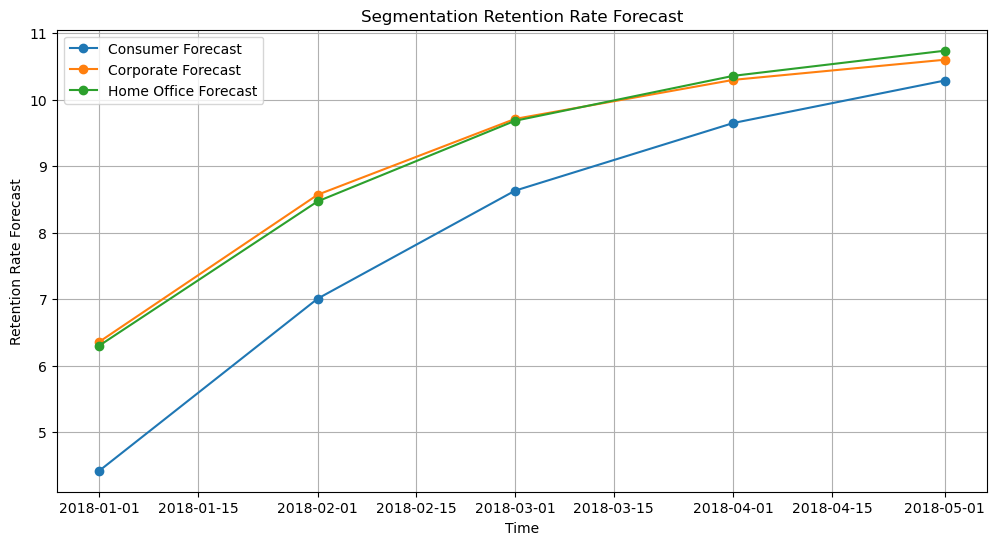

In [124]:
# Plot the forecasts for each segment
plt.figure(figsize=(12, 6))
plt.plot(forecast_df.index, forecast_df['Consumer_Forecast'], label='Consumer Forecast', marker='o')
plt.plot(forecast_df.index, forecast_df['Corporate_Forecast'], label='Corporate Forecast', marker='o')
plt.plot(forecast_df.index, forecast_df['Home_Office_Forecast'], label='Home Office Forecast', marker='o')

plt.xlabel('Time')
plt.ylabel('Retention Rate Forecast')
plt.title('Segmentation Retention Rate Forecast')
plt.legend()
plt.grid(True)

plt.show()

Hypothesis Testing

In [ ]:
for segment in customer_segments:
    segment_data = retention_df[retention_df['Segment'] == segment]
    
    for other_segment in customer_segments:
        if segment == other_segment:
            continue
        
        other_segment_data = retention_df[retention_df['Segment'] == other_segment]

        # Perform a two-sample z-test for proportions
        count = np.array([segment_data['Retention Rate'].mean(), other_segment_data['Retention Rate'].mean()])
        nobs = np.array([len(segment_data), len(other_segment_data)])
        z, p = proportions_ztest(count, nobs)

        print(f"Hypothesis test result between {segment} and {other_segment}:")
        print(f"Z-score: {z}, p-value: {p}")

        if p < 0.05:  
            print("Significant difference\n")
        else:
            print("No significant difference\n")

Hypothesis test result between Consumer and Home Office:
Z-score: 0.0833156939085875, p-value: 0.9336005217456371
No significant difference

Hypothesis test result between Consumer and Corporate:
Z-score: 0.1695628253822122, p-value: 0.8653539601600966
No significant difference

Hypothesis test result between Home Office and Consumer:
Z-score: -0.0833156939085875, p-value: 0.9336005217456371
No significant difference

Hypothesis test result between Home Office and Corporate:
Z-score: 0.08625944393210853, p-value: 0.9312601773182416
No significant difference

Hypothesis test result between Corporate and Consumer:
Z-score: -0.1695628253822122, p-value: 0.8653539601600966
No significant difference

Hypothesis test result between Corporate and Home Office:
Z-score: -0.08625944393210853, p-value: 0.9312601773182416
No significant difference



C:\Users\brown\AppData\Local\Temp\ipykernel_2700\2634524366.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


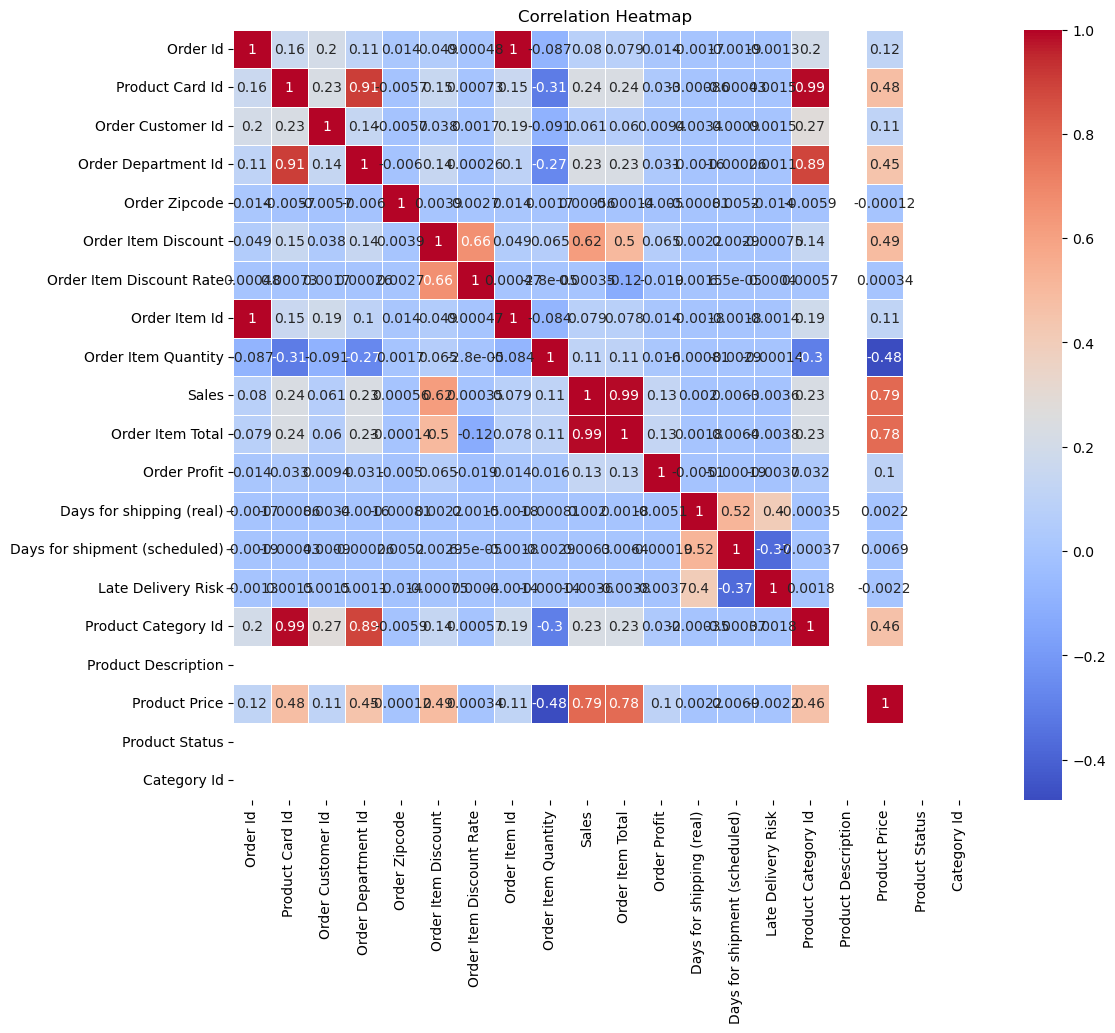

In [125]:
# Calculate the correlation matrix
correlation_matrix = merged_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Step 6: Correlation and Regression Analysis to identify factors potentially affecting retention rates.

#Correlation analysis

In [ ]:
#Is there a correlation between order frequency (order item quantity) and profit
print(merged_df.columns)

# Calculate the correlation
profitvsfreq = merged_df[['Order Item Quantity', 'Order Profit']].corr()

print(profitvsfreq)

Index(['Order Id', 'Product Card Id', 'Order Customer Id',
       'Order Department Id', 'Market', 'Order City', 'Order Country',
       'Order Region', 'Order State', 'Order Status', 'Order Zipcode',
       'order date (DateOrders)', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Quantity',
       'Sales', 'Order Item Total', 'Order Profit', 'Type',
       'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Delivery Status', 'Late Delivery Risk', 'Customer Id', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode', 'Order Month'],
      dtype='object')
                     Order Item Quantity  Order Profit
Order Item Quantity                 1.00          0.02
Order Profit                        0.02          1.00


In [ ]:
# Calculate the correlation between Item Total (total dollar value of order following discount) and Sales (gross sales before discount)
TotalvsSales = merged_df[['Order Item Total', 'Sales']].corr()
print(TotalvsSales)

                  Order Item Total  Sales
Order Item Total              1.00   0.99
Sales                         0.99   1.00


In [ ]:
# Calculate the correlation between Discount and Sales
DiscountvsSales = merged_df[['Order Item Discount', 'Sales']].corr()
print(DiscountvsSales)

                     Order Item Discount  Sales
Order Item Discount                 1.00   0.62
Sales                               0.62   1.00


In [ ]:
# Calculate the correlation between Discount and Sales
DiscountvsTotal = merged_df[['Order Item Discount', 'Order Item Total']].corr()
print(DiscountvsTotal)

                     Order Item Discount  Order Item Total
Order Item Discount                 1.00              0.50
Order Item Total                    0.50              1.00


In [ ]:
# Calculate the correlation between Days of shipping and Late Delivery Risk
ShippingRisk = merged_df[['Days for shipping (real)', 'Late Delivery Risk']].corr()
print(ShippingRisk)

                          Days for shipping (real)  Late Delivery Risk
Days for shipping (real)                      1.00                0.40
Late Delivery Risk                            0.40                1.00


Linear Regression Analysis

R-squared: 0.98


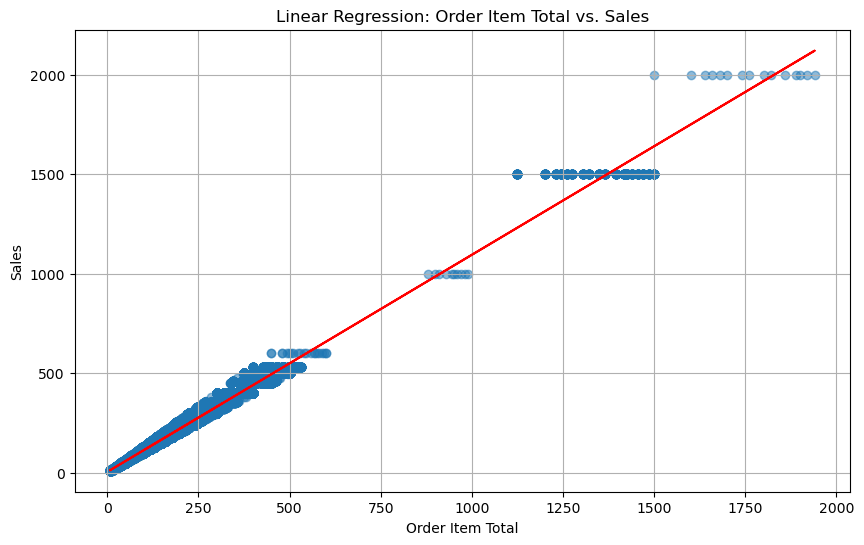

In [ ]:
# Extract 'Order Item Total' as the independent variable (X) and 'Sales' as the dependent variable (y)
X = merged_df['Order Item Total'].values.reshape(-1, 1)
y = merged_df['Sales'].values

# Create a linear regression model
regression_model = LinearRegression()

# Fit the model to the data
regression_model.fit(X, y)

# Predict 'Sales' based on the fitted model
y_pred = regression_model.predict(X)

# Calculate the R-squared value
r_squared = r2_score(y, y_pred)

# Print the R-squared value
print(f'R-squared: {r_squared:.2f}')

# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5)
plt.plot(X, y_pred, color='red')
plt.title('Linear Regression: Order Item Total vs. Sales')
plt.xlabel('Order Item Total')
plt.ylabel('Sales')
plt.grid(True)

#Show the plot
plt.show()

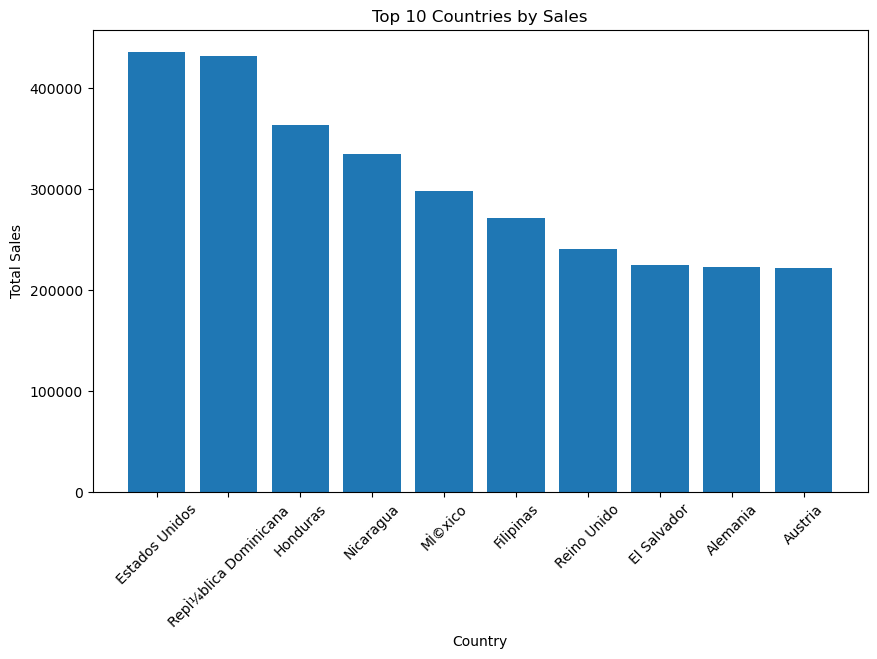

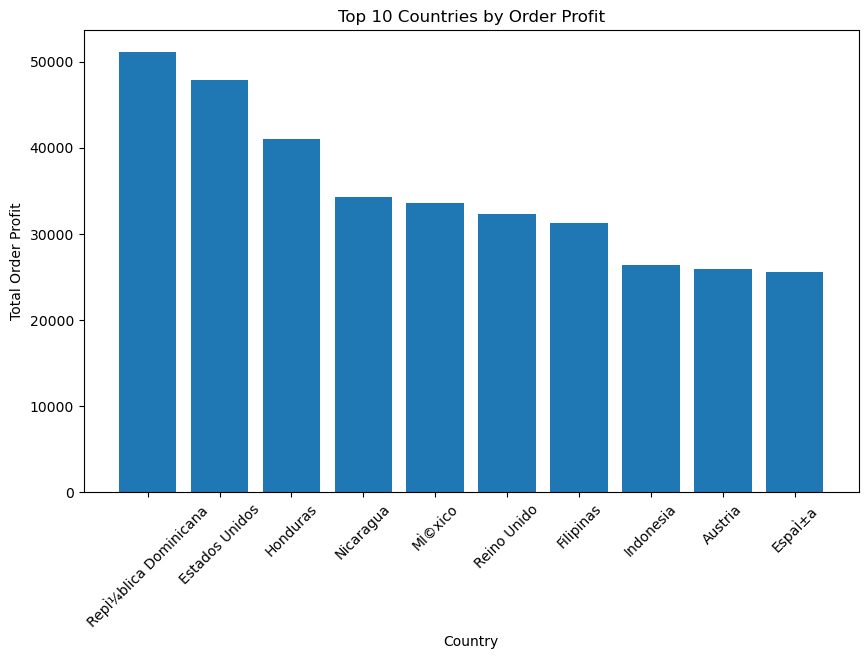

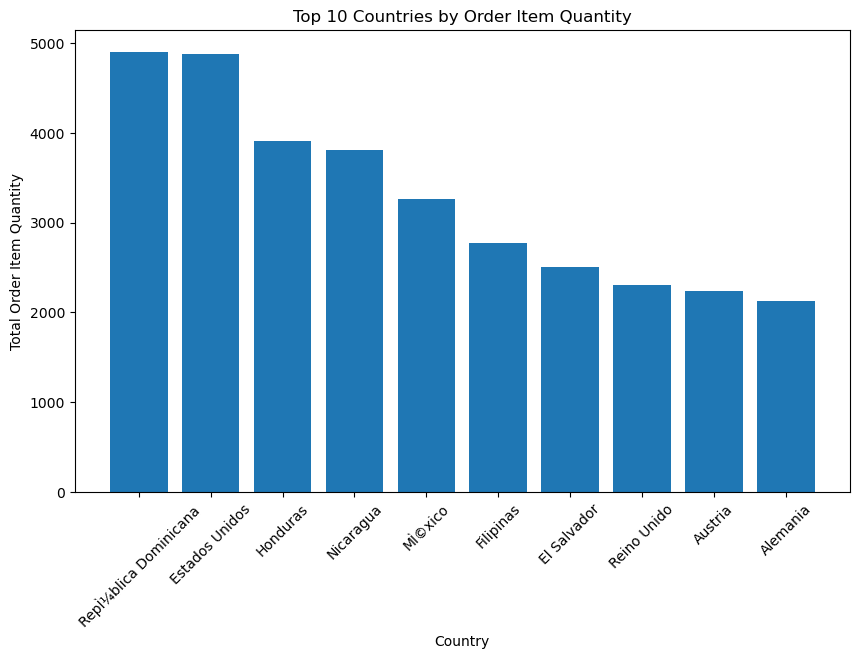

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping 'orders' data to determine sales by city, country, and region
grouped_data = orders.groupby(['Order City', 'Order Country', 'Order Region']).agg({
    'Sales': 'sum',
    'Order Profit': 'sum',
    'Order Item Quantity': 'sum'
}).reset_index()

# Sort the data by 'Sales' to identify the top 5 countries
top_sales_countries = grouped_data.sort_values(by='Sales', ascending=False).head(13)

# Create a bar chart for 'Sales' for the top 5 countries
plt.figure(figsize=(10, 6))
plt.bar(top_sales_countries['Order Country'], top_sales_countries['Sales'])
plt.title('Top 10 Countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Sort the data by 'Order Profit' to identify the top 5 countries
top_profit_countries = grouped_data.sort_values(by='Order Profit', ascending=False).head(12)

# Create a bar chart for 'Order Profit' for the top 5 countries
plt.figure(figsize=(10, 6))
plt.bar(top_profit_countries['Order Country'], top_profit_countries['Order Profit'])
plt.title('Top 10 Countries by Order Profit')
plt.xlabel('Country')
plt.ylabel('Total Order Profit')
plt.xticks(rotation=45)
plt.show()

# Sort the data by 'Order Item Quantity' to identify the top 5 countries
top_quantity_countries = grouped_data.sort_values(by='Order Item Quantity', ascending=False).head(14)

# Create a bar chart for 'Order Item Quantity' for the top 5 countries
plt.figure(figsize=(10, 6))
plt.bar(top_quantity_countries['Order Country'], top_quantity_countries['Order Item Quantity'])
plt.title('Top 10 Countries by Order Item Quantity')
plt.xlabel('Country')
plt.ylabel('Total Order Item Quantity')
plt.xticks(rotation=45)
plt.show()

# Export to Excel 
top_sales_countries.to_excel('top_sales_countries.xlsx', index=False)
top_profit_countries.to_excel('top_profit_countries.xlsx', index=False)
top_quantity_countries.to_excel('top_quantity_countries.xlsx', index=False)


In [ ]:
# Merge customers with orders to get the customer segments
merged_data = pd.merge(orders, customers, left_on='Order Customer Id', right_on='Customer Id')

# Group customers by country, city, and region and count the number of customers in each segment
grouped_country = merged_data.groupby(['Order Country', 'Customer Segment'])['Customer Id'].count().reset_index()
grouped_city = merged_data.groupby(['Order City', 'Customer Segment'])['Customer Id'].count().reset_index()
grouped_region = merged_data.groupby(['Order Region', 'Customer Segment'])['Customer Id'].count().reset_index()

# Sort the results in descending order
top_country_segments = grouped_country.sort_values(by='Customer Id', ascending=False).head(5)
top_city_segments = grouped_city.sort_values(by='Customer Id', ascending=False).head(5)
top_region_segments = grouped_region.sort_values(by='Customer Id', ascending=False).head(5)

print("Top 5 Customer Segments by Country:")
print(top_country_segments)

print("\nTop 5 Customer Segments by City:")
print(top_city_segments)

print("\nTop 5 Customer Segments by Region:")
print(top_region_segments)

Top 5 Customer Segments by Country:
      Order Country Customer Segment  Customer Id
127  Estados Unidos         Consumer        13029
128  Estados Unidos        Corporate         7452
280         MÌ©xico         Consumer         6893
139         Francia         Consumer         6864
6          Alemania         Consumer         4969

Top 5 Customer Segments by City:
         Order City Customer Segment  Customer Id
6972  Santo Domingo         Consumer         1115
5464  New York City         Consumer         1104
4520    Los Angeles         Consumer          957
7596    Tegucigalpa         Consumer          903
4724        Managua         Consumer          890

Top 5 Customer Segments by Region:
       Order Region Customer Segment  Customer Id
9   Central America         Consumer        14822
66   Western Europe         Consumer        14142
10  Central America        Corporate         8557
67   Western Europe        Corporate         8330
36    South America         Consumer        